In [1]:
############################################
BaseDir      = 'IntroDDSJpn/Chap03/'
OutputDir    = '3OLS-0602Line/'
FileBaseName = '3OLS-0602Line'

* Google Colabかどうかを判別し、このJupyter Notebookのあるディレクトリを特定します。

In [2]:
############################################
import sys
import os
############################################
def IsGoogleColab():
  if 'google.colab' in sys.modules:
    return True
  else:
    return False
############################################
if IsGoogleColab():
  #
  from google.colab import drive
  drive.mount('/content/drive')
  #
  IpynbDir = 'drive/My Drive/Colab Notebooks/' + BaseDir
else:
  #
  IpynbDir =  os.getcwd() + '/'
############################################
print( 'ipynb file path = %s' % IpynbDir )

ipynb file path = d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap03/


* 必要なパッケージを読み込み、ファイルの出力先のディレクトリを用意します。

In [3]:
############################################
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
print('matplotlib Ver.', mpl.__version__)
#
############################################
import numpy as np
import numpy.random as rd
print('numpy      Ver.', np.__version__)
#
############################################
import sklearn as skl
import sklearn.linear_model as lm
print('sklearn    Ver.', skl.__version__)
#
############################################
FilePath = IpynbDir + OutputDir
print( 'FilePath = %s' % FilePath )
#
if( True != os.path.isdir(FilePath) ):
    print('  making %s' % FilePath )
    os.mkdir(FilePath)
else:
    print(' %s is exist.' % FilePath )

matplotlib Ver. 3.9.2
numpy      Ver. 1.26.4
sklearn    Ver. 1.5.2
FilePath = d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap03/3OLS-0602Line/
  making d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap03/3OLS-0602Line/


最小二乗法を線形モデルで行う。
* 直線回帰: $\boldsymbol{y}=a\,\boldsymbol{x}+b$

$$
\left(
\begin{array}{c}
y_{1} \\
y_{2} \\
\vdots \\
y_{M}
\end{array}
\right)
\approx
\left(
\begin{array}{c}
x_{1}  \\
x_{2}  \\
\vdots \\
x_{M}  
\end{array}
\right)
\underbrace{
  \left(
  \begin{array}{c}
  a
  \end{array}
  \right)
}_{\boldsymbol{\omega}}
+
b
\cdots
\left\{
\begin{array}{c}
a_{\rm true} = 2.0 \\
b_{\rm true} = 0.3
\end{array}
\right.
$$

In [4]:
############################################
a_true = 2.0
b_true = 0.3
#
w_true = np.array([[a_true]])
#
print(w_true)
print(b_true)

[[2.]]
0.3


解析データの準備
* データ点数: $M=21$
* $x$値の範囲: $x=[-2.5, +2.5]$

In [5]:
############################################
M = 21 #501
#
x = np.linspace(-2.5,+2.5, num=M)
#
print(x)

[-2.5  -2.25 -2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25
  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25  2.5 ]


計画行列$X$の準備

$$
\boldsymbol{X}
=
\left(
\begin{array}{c}
x_{1}  \\
x_{2}  \\
\vdots \\
x_{M}  
\end{array}
\right)
$$

In [6]:
############################################
X = np.zeros((M,1))
#
X[:,0] = x
#
print(X)

[[-2.5 ]
 [-2.25]
 [-2.  ]
 [-1.75]
 [-1.5 ]
 [-1.25]
 [-1.  ]
 [-0.75]
 [-0.5 ]
 [-0.25]
 [ 0.  ]
 [ 0.25]
 [ 0.5 ]
 [ 0.75]
 [ 1.  ]
 [ 1.25]
 [ 1.5 ]
 [ 1.75]
 [ 2.  ]
 [ 2.25]
 [ 2.5 ]]


真値データの準備。
* $\boldsymbol{y}=a\,\boldsymbol{x}+b$

$$
\left(
\begin{array}{c}
y_{1} \\
y_{2} \\
\vdots \\
y_{M}
\end{array}
\right)
\approx
\left(
\begin{array}{c}
x_{1}  \\
x_{2}  \\
\vdots \\
x_{M}  
\end{array}
\right)
\underbrace{
  \left(
  \begin{array}{c}
  a
  \end{array}
  \right)
}_{\boldsymbol{\omega}}
+
b
\cdots
\left\{
\begin{array}{c}
a_{\rm true} = 2.0 \\
b_{\rm true} = 0.3
\end{array}
\right.
$$

$$
\boldsymbol{y}_{\rm true}
=
\boldsymbol{X}
\boldsymbol{\omega}_{\rm true}
+
b_{\rm true}
,\cdots
\boldsymbol{\omega}_{\rm true}
=
\left(
\begin{array}{c}
a_{\rm true}
\end{array}
\right)
$$

In [7]:
############################################
y_true = X @ w_true + b_true
#
print(y_true)

[[-4.7]
 [-4.2]
 [-3.7]
 [-3.2]
 [-2.7]
 [-2.2]
 [-1.7]
 [-1.2]
 [-0.7]
 [-0.2]
 [ 0.3]
 [ 0.8]
 [ 1.3]
 [ 1.8]
 [ 2.3]
 [ 2.8]
 [ 3.3]
 [ 3.8]
 [ 4.3]
 [ 4.8]
 [ 5.3]]


誤差を重畳させたデータの準備。
* $\boldsymbol{y}_0=\boldsymbol{y}_{\rm true}+{\cal N}(0,\sigma_{0});\;(\sigma_{0}=3.0\times10^{0})$
* $\boldsymbol{y}_1=\boldsymbol{y}_{\rm true}+{\cal N}(0,\sigma_{1});\;(\sigma_{1}=1.0\times10^{0})$
* $\boldsymbol{y}_2=\boldsymbol{y}_{\rm true}+{\cal N}(0,\sigma_{2});\;(\sigma_{2}=3.0\times10^{-1})$

In [8]:
############################################
noise = rd.randn(M).reshape(M,1)
# ノイズの平均値を0、標準偏差を1に規格化
noise = noise - np.mean( noise )
noise = noise / np.std( noise )
y0 = y_true + 3.0E-0 * noise
#
noise = rd.randn(M).reshape(M,1)
# ノイズの平均値を0、標準偏差を1に規格化
noise = noise - np.mean( noise )
noise = noise / np.std( noise )
y1 = y_true + 1.0E-0 * noise
#
noise = rd.randn(M).reshape(M,1)
# ノイズの平均値を0、標準偏差を1に規格化
noise = noise - np.mean( noise )
noise = noise / np.std( noise )
y2 = y_true + 3.0E-1 * noise

グラフを描く関数

In [9]:
############################################
def Grf_data( x_data, y_sets ):
  #
  plt.rcParams['font.size'] = 16
  #
  fig = plt.figure( figsize=(6,6) )
  fig.subplots_adjust(left=0.18, right=0.97, top=0.94, bottom=0.1)
  #
  ax1 = fig.add_subplot(1,1,1)
  #
  ax1.set_xlim( -2.5, 2.5 )
  ax1.set_xlabel( r'$x$' )
  #
  ax1.set_ylim( -6.0, 6.0 )
  ax1.set_ylabel( r'$y$' )
  #
  for y_set in y_sets:
    # [y_data, plottype, label, 'color', size/linewidth, marker/linestyle]
    #   plottype = 0 -> plot
    #   plottype = 1 -> scatter
    if   y_set[1] == 0:
      #
      ax1.plot( x_data, y_set[0], label=y_set[2], color=y_set[3], linewidth=y_set[4], linestyle=y_set[5] )
      #
    elif y_set[1] == 1:
      #
      ax1.scatter( x_data, y_set[0], label=y_set[2], color=y_set[3], s=y_set[4], marker=y_set[5] )
      #
  #
  plt.title('y=ax+b, (a=+%.3f, b=%+.3f)' % (a_true, b_true) )
  #
  plt.legend(loc='lower right')
  plt.show()
  #
  return fig

データのグラフ描画

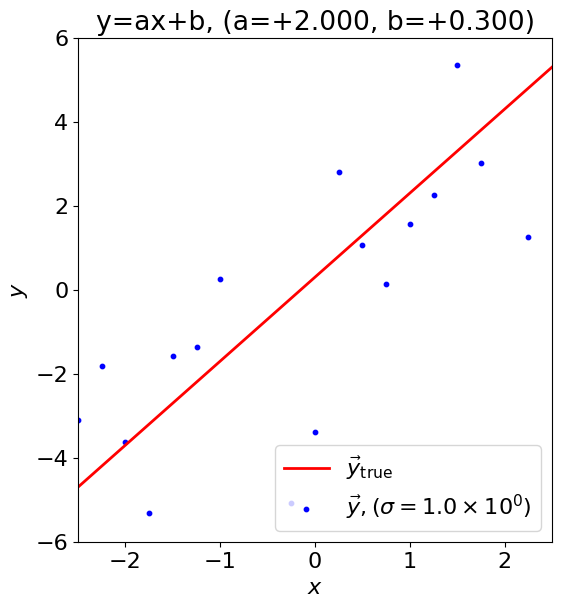

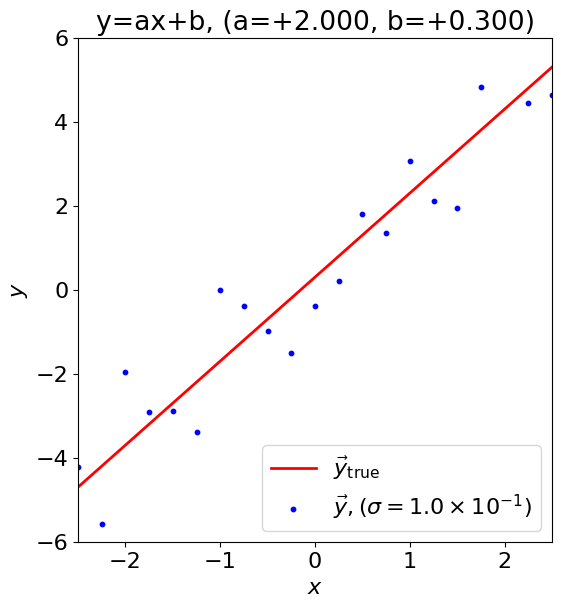

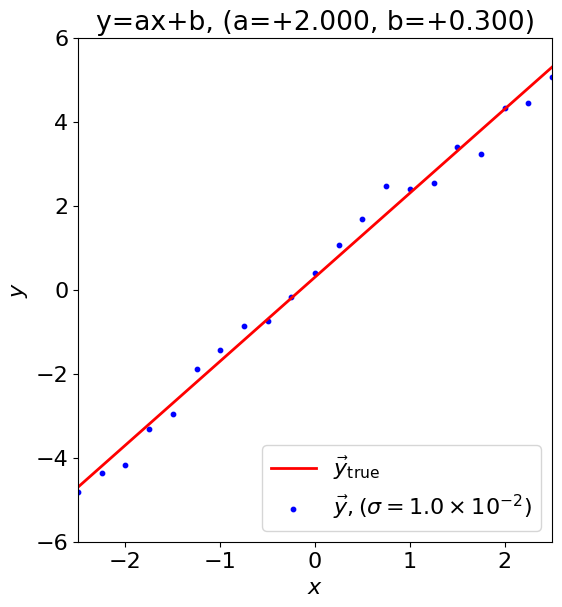

In [10]:
############################################
y_true_set = [ y_true, 0, r'$\vec{y}_{\rm true}$',                 'red',  2, 'solid' ]
y0_set     = [ y0,     1, r'$\vec{y}, (\sigma=1.0\times10^{0})$',  'blue', 10, 'o' ]
y1_set     = [ y1,     1, r'$\vec{y}, (\sigma=1.0\times10^{-1})$', 'blue', 10, 'o' ]
y2_set     = [ y2,     1, r'$\vec{y}, (\sigma=1.0\times10^{-2})$', 'blue', 10, 'o' ]
#
############################################
y0_sets     = [ y_true_set, y0_set ]
fig = Grf_data( x, y0_sets )
#
fig.savefig( FilePath + FileBaseName + '-y0.pdf' )
#
############################################
y1_sets     = [ y_true_set, y1_set ]
fig = Grf_data( x, y1_sets )
#
fig.savefig( FilePath + FileBaseName + '-y1.pdf' )
#
############################################
y2_sets     = [ y_true_set, y2_set ]
fig = Grf_data( x, y2_sets )
#
fig.savefig( FilePath + FileBaseName + '-y2.pdf' )
#

線形回帰
* sklearn.linear_model.LinearRegression
  * https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
  * 引数:
    * fit_intercept: 切片を推定するか否か
* 返値:
  * coef_: $\hat{\boldsymbol{\omega}}$ 回帰係数
  * intercept_: 切片項

線形回帰を実行

* 線形回帰オブジェクトを生成:
  ```
  reg = lm.LinearRegression()
  ```

* 回帰を実行:
  ```
  reg.fit( X, y_target )
  ```

* 回帰パラメータ
  ```
  w_ = reg.coef_
  a_ = w_[0][0]          # 1x1の行列で返ってくるのでスカラー化
  b_ = reg.intercept_[0] # ベクトルで返ってくるのでスカラー化
  ```

* 回帰パラメータを用いて再現データを生成
  ```
  yreg_ = X @ w_ + b_
  ```

* グラフを出力

[[1.93566837]]
0.29999999999999977
[-4.53917093 -4.05525384 -3.57133674 -3.08741965 -2.60350256 -2.11958547
 -1.63566837 -1.15175128 -0.66783419 -0.18391709  0.3         0.78391709
  1.26783419  1.75175128  2.23566837  2.71958547  3.20350256  3.68741965
  4.17133674  4.65525384  5.13917093]


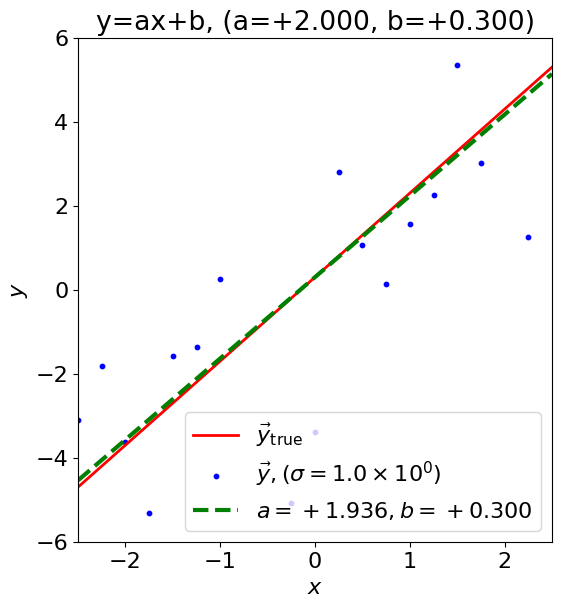

In [11]:
############################################
y_target = y0
#
y_sets     = [ y_true_set, y0_set ]
#
pdfFName = FilePath + FileBaseName + '-y0reg.pdf'
############################################
# 線形回帰オブジェクトを生成
reg = lm.LinearRegression()
#
# 回帰実行
reg.fit( X, y_target )
#
w_ = reg.coef_
a_ = w_[0][0]          # 1x1の行列で返ってくるのでスカラー化
b_ = reg.intercept_[0] # ベクトルで返ってくるのでスカラー化
#
print( w_ )
print( b_ )
legend_ = r'$a=%+.3f, b=%+.3f$' % (a_,b_)
#
# 回帰結果
yreg_ = X @ w_ + b_
#
# ベクトルに変換しておく
yreg_ = yreg_.reshape( [-1, ] )
print( yreg_ )
#
yreg_set = [ yreg_, 0, legend_, 'green', 3, 'dashed' ]
#
y_sets.append( yreg_set )
#
fig = Grf_data( x, y_sets )
#
fig.savefig( pdfFName )

[[1.9677508]]
0.29999999999999993
[-4.61937701 -4.12743931 -3.63550161 -3.14356391 -2.65162621 -2.15968851
 -1.6677508  -1.1758131  -0.6838754  -0.1919377   0.3         0.7919377
  1.2838754   1.7758131   2.2677508   2.75968851  3.25162621  3.74356391
  4.23550161  4.72743931  5.21937701]


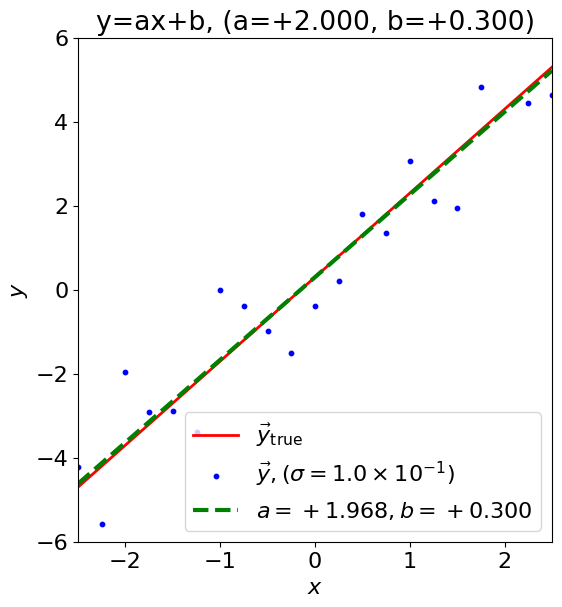

In [12]:
############################################
y_target = y1
#
y_sets     = [ y_true_set, y1_set ]
#
pdfFName = FilePath + FileBaseName + '-y1reg.pdf'
############################################
# 線形回帰オブジェクトを生成
reg = lm.LinearRegression()
#
# 回帰実行
reg.fit( X, y_target )
#
w_ = reg.coef_
a_ = w_[0][0]          # 1x1の行列で返ってくるのでスカラー化
b_ = reg.intercept_[0] # ベクトルで返ってくるのでスカラー化
#
print( w_ )
print( b_ )
legend_ = r'$a=%+.3f, b=%+.3f$' % (a_,b_)
#
# 回帰結果
yreg_ = X @ w_ + b_
#
# ベクトルに変換しておく
yreg_ = yreg_.reshape( [-1, ] )
print( yreg_ )
#
yreg_set = [ yreg_, 0, legend_, 'green', 3, 'dashed' ]
#
y_sets.append( yreg_set )
#
fig = Grf_data( x, y_sets )
#
fig.savefig( pdfFName )

[[1.9946227]]
0.29999999999999993
[-4.68655675 -4.18790108 -3.6892454  -3.19058973 -2.69193405 -2.19327838
 -1.6946227  -1.19596703 -0.69731135 -0.19865568  0.3         0.79865568
  1.29731135  1.79596703  2.2946227   2.79327838  3.29193405  3.79058973
  4.2892454   4.78790108  5.28655675]


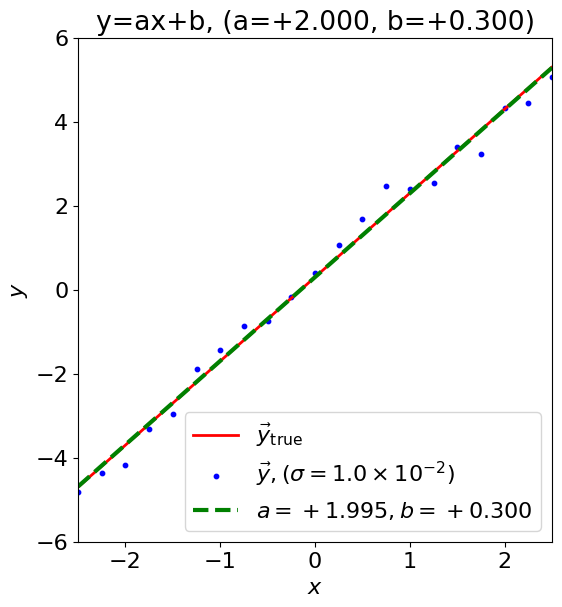

In [13]:
############################################
y_target = y2
#
y_sets     = [ y_true_set, y2_set ]
#
pdfFName = FilePath + FileBaseName + '-y2reg.pdf'
############################################
# 線形回帰オブジェクトを生成
reg = lm.LinearRegression()
#
# 回帰実行
reg.fit( X, y_target )
#
w_ = reg.coef_
a_ = w_[0][0]          # 1x1の行列で返ってくるのでスカラー化
b_ = reg.intercept_[0] # ベクトルで返ってくるのでスカラー化
#
print( w_ )
print( b_ )
legend_ = r'$a=%+.3f, b=%+.3f$' % (a_,b_)
#
# 回帰結果
yreg_ = X @ w_ + b_
#
# ベクトルに変換しておく
yreg_ = yreg_.reshape( [-1, ] )
print( yreg_ )
#
yreg_set = [ yreg_, 0, legend_, 'green', 3, 'dashed' ]
#
y_sets.append( yreg_set )
#
fig = Grf_data( x, y_sets )
#
fig.savefig( pdfFName )